# 3.2 Hierarchical Clustering: Guided Practice

In [29]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import seaborn as sns
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

## Part 1: Format the data

#### 1.1 Import the iris data

In [22]:
x = '../../assets/datasets/iris.csv'

#### 1.2 Convert the data to a pandas dataframe and format the data

In [23]:
iris = pd.read_csv(x)

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Next, since we have categorical data, let's go ahead and covert that data to numeric dummy variables

In [34]:
iris['flowerdum'] = iris.Name.replace(to_replace = ['Iris-setosa',
                                                 'Iris-versicolor',
                                                 'Iris-virginica'],
                                  value = [0,1,2])

array([0, 1, 2])

#### 1.3 Plot the data

Let's take a look at some of the clusters to get a feel for our data: 

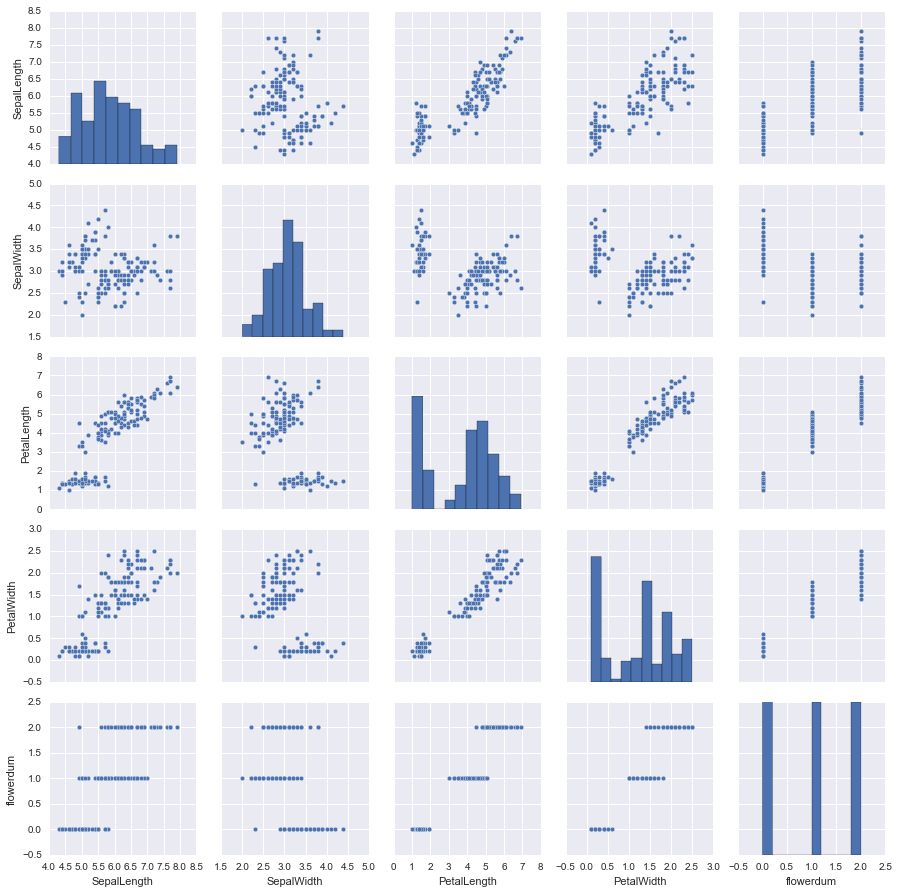

In [37]:
sns.pairplot(iris[[x for x in iris.columns if x != 'Name']])

Lastly, let's create a matrix to pass to the clustering algorithm 

In [44]:
X = iris[['PetalWidth', 'SepalLength', 'PetalLength']].as_matrix(columns=None)

## Part 2: Hierarchical Clustering

Now, let's perform the actual clustering on our set

In [45]:
Z = linkage(X, 'ward')

#### 2.1 Cophenetic Coefficient

Now, calculate the cophenetic correlation coefficient:

In [46]:
c, coph = cophenet(Z, pdist(X))

In [47]:
c

0.86858501497642016

## Part 3: Calculate the dendrogram

#### 3.1 Plot the dendrogram

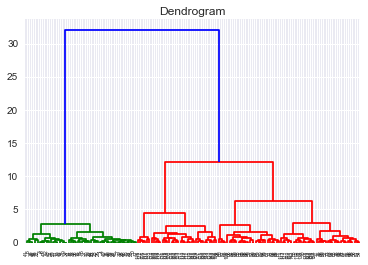

In [48]:
plt.title('Dendrogram')
dendrogram(Z)
plt.show()

**Question:** What can we tell about the clusters by visually inspecting them?

We can see that there are two primary clusters, the green cluster and the red cluster, as well as the green cluster only contains values < 50 while the red cluster contrains values > 50

Since we can't derive much information from this larger dendrogram, let's plot a truncated version of the dendrogram

#### 3.2 Calculate the cluster labels

#### 3.3 Plot the resulting clusters